In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output



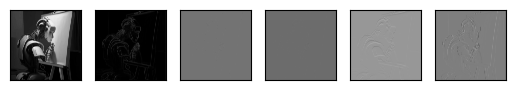

In [4]:

img = cv.imread('/Users/nabeelnazeer/Documents/Image Processing/Parseval/robot.png',cv.IMREAD_COLOR)
i = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow("image", img)
# cv.waitKey(0)
# cv.imshow("image", gray_image)
# cv.waitKey(0)
filter1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
filter2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filter3 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
filter4 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

matrix = np.array(i)
pad_height = filter1.shape[0] - 1
pad_width = filter1.shape[1] - 1
padded_image = np.pad(matrix, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')


output_image1 = convolve2D(padded_image, filter1, padding=0, strides=1)
output_image2 = convolve2D(padded_image, filter2, padding=0, strides=1)
output_image3 = convolve2D(padded_image, filter3, padding=0, strides=1)
output_image4 = convolve2D(padded_image, filter4, padding=0, strides=1)
output = (output_image1**2 + output_image2**2)**0.5
plt.subplot(1,6,1),plt.imshow(padded_image,cmap='gist_gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1,6,2),plt.imshow(output,cmap='gist_gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1,6,3),plt.imshow(output_image3,cmap='gist_gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1,6,4),plt.imshow(output_image4,cmap='gist_gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1,6,5),plt.imshow(output_image1,cmap='gist_gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1,6,6),plt.imshow(output_image2,cmap='gist_gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [5]:

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# importing an image as img
img = cv.imread('/Users/nabeelnazeer/Documents/Image Processing/Parseval/robot.png', cv.IMREAD_GRAYSCALE)

img_f      = np.fft.fft2(img,norm='ortho')
norm_img_f = np.divide(img_f,1)
i_img_f    = np.fft.ifft2(img_f,norm='ortho')

k1 = np.linalg.norm(img,2,keepdims=False)
mag_img = np.abs(img)
m1      = np.sum(mag_img)

k2= np.linalg.norm(norm_img_f,2,keepdims=False)
mag_norm_img_f = np.abs(norm_img_f)
m2             = np.sum(mag_norm_img_f)

k3 = np.linalg.norm(i_img_f,2,keepdims=False)
mag_i_img_f = np.abs(i_img_f)
m3          = np.sum(mag_i_img_f )

print(m1,m2,m3)
print(k1,k2,k3)

magnitude = np.log(mag_norm_img_f)

181241559 10336796.931615394 181241559.0
141747.86395255095 141747.86395255083 141747.86395255092


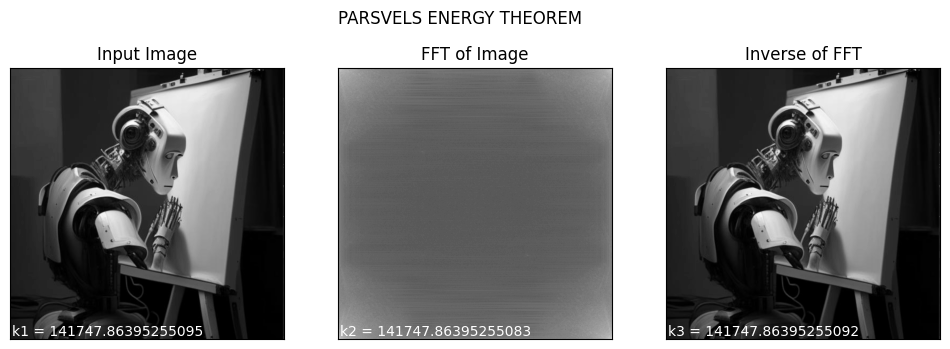

In [11]:
import matplotlib.pyplot as plt

# Assuming you have already defined img, magnitude, mag_i_img_f, and k1, k2, k3

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.text(10, img.shape[0] - 20, f'k1 = {k1}', color='white')

plt.subplot(1, 3, 2)
plt.imshow(magnitude, cmap='gray')
plt.title('FFT of Image')
plt.xticks([])
plt.yticks([])
plt.text(10, magnitude.shape[0] - 20, f'k2 = {k2}', color='white')

plt.subplot(1, 3, 3)
plt.imshow(mag_i_img_f, cmap='gray')
plt.title('Inverse of FFT')
plt.xticks([])
plt.yticks([])
plt.text(10, mag_i_img_f.shape[0] - 20, f'k3 = {k3}', color='white')

plt.suptitle("PARSVELS ENERGY THEOREM")
plt.show()


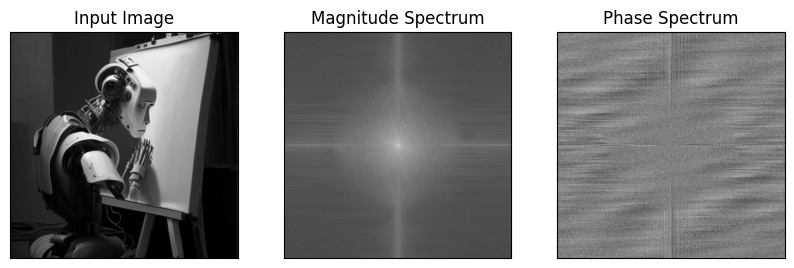

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/Users/nabeelnazeer/Documents/Image Processing/Parseval/robot.png', cv2.IMREAD_GRAYSCALE)

# Compute the Fourier transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(fshift))
magnitude_spectrum_normalized = np.uint8(255 * magnitude_spectrum / np.max(magnitude_spectrum))

# Phase spectrum
phase_spectrum = np.angle(fshift)

# Display the image and its Fourier transforms
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum_normalized, cmap='gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum')
plt.xticks([])
plt.yticks([])

plt.show()
